**1. Using IBM Granite to Classification and Summarization Cyberbullying Data**

*   Instalasi Library

In [1]:
!pip install langchain_community
!pip install replicate
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.1 MB/s eta 0:00:00


*   Konfigurasi API Key Replicate
*   Inisialisasi Model IBM Granite

In [2]:
import os
from langchain_community.llms import Replicate
from google.colab import userdata

# Ambil API token dari Google Colab Secrets
api_token = userdata.get("REPLICATE_API_KEY")
os.environ["REPLICATE_API_TOKEN"] = api_token

# Inisialisasi IBM Granite model
model = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=api_token,
)


*   Memuat dan Membersihkan Dataset CSV
*   Melihat Data Awal

In [3]:
import pandas as pd

# Upload CSV dari sidebar atau pastikan path benar
file_path = "/content/dataset_cyberbullying.csv"  # Ganti sesuai nama file kamu
# Try reading the CSV with a different encoding
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')


# Pastikan hanya ambil kolom yang dibutuhkan
df = df[['Komentar', 'Kategori']].dropna()

# Cek 5 baris awal
display(df.head())

,Komentar,Kategori
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying
1,"""makan nasi padang aja begini badannya""",Non-bullying
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying


*   Mengambil Komentar Teratas
*   Melakukan Loop untuk Ringkasan dan Klasifikasi AI
*   Mencetak Hasil Ringkasan dan Klasifikasi per Komentar

In [4]:
# Ambil 5 komentar teratas dari dataset
top_komentar = df['Komentar'].dropna().head(5).tolist()

# List untuk menyimpan hasil
ringkasan_list = []
klasifikasi_list = []

# Loop tiap komentar
for i, komentar in enumerate(top_komentar):
    print(f"\n🔹 Komentar ke-{i+1}:\n\"{komentar}\"")

    # Prompt untuk merangkum komentar
    prompt_summary = f"""
Tugas kamu adalah merangkum komentar media sosial berikut menjadi satu kalimat pendek yang menjelaskan inti komentar dalam bahasa Indonesia.

Komentar:
"{komentar}"

Berikan hanya satu kalimat ringkasan tanpa penjelasan tambahan.
"""
    summary = model.invoke(prompt_summary).strip()
    ringkasan_list.append(summary)
    print(f"\n📄 Ringkasan:\n{summary}")

    # Prompt untuk klasifikasi komentar (Bullying / Bukan Bullying)
    prompt_klasifikasi = f"""
Evaluasilah komentar media sosial berikut berdasarkan kriteria berikut:

Komentar dikategorikan sebagai **Bullying** jika:
- Mengandung hinaan, cercaan, atau ejekan langsung atau tersirat
- Menyerang fisik, penampilan, nama, keluarga, atau kepribadian seseorang
- Mengganggu privasi, martabat, atau kenyamanan orang lain
- Bisa menyebabkan dampak emosional atau psikologis

Komentar dikategorikan sebagai **Bukan Bullying** jika:
- Netral, tidak menyerang personal
- Opini umum tanpa unsur hinaan/pelecehan

Komentar:
"{komentar}"

Berikan hasil dengan format seperti berikut:

🧾 Hasil Evaluasi:
<Analisis singkat dalam 1-2 kalimat>
Kategori: <Bullying / Bukan Bullying>
"""
    klasifikasi = model.invoke(prompt_klasifikasi).strip()
    klasifikasi_list.append(klasifikasi)
    print(f"\n{klasifikasi}")



🔹 Komentar ke-1:
""Kaka tidur yaa, udah pagi, gaboleh capek2""

📄 Ringkasan:
Komentar mengingat teman untuk bangun tidur karena sudah pagi.

🧾 Hasil Evaluasi:
Komentar tersebut tidak dikategorikan sebagai bullying, karena tidak mengandung hinaan, cercaan, atau ejekan langsung atau tersirat, tidak menyerang fisik, penampilan, nama, keluarga, atau kepribadian seseorang, tidak mengganggu privasi, martabat, atau kenyamanan orang lain, dan tidak bisa menyebabkan dampak emosional atau psikologis. Ini adalah pesan yang netral dan tidak menyerang personal.

Kategori: Bukan Bullying

🔹 Komentar ke-2:
""makan nasi padang aja begini badannya""

📄 Ringkasan:
Inti komentar: Makan nasi Padang secara berkala dapat meningkatkan tubuh badan.

🧾 Hasil Evaluasi:
Komentar ini dikategorikan sebagai **Bullying** karena menyerang penampilan seseorang dengan menghina badannya berdasarkan makanan yang digemari.

Kategori: Bullying

🔹 Komentar ke-3:
""yang aku suka dari dia adalah selalu cukur jembut sebelum m

*   Membuat DataFrame Hasil


In [5]:
df_hasil = pd.DataFrame({
    "Komentar": top_komentar,
    "Ringkasan": ringkasan_list,
    "Evaluasi": klasifikasi_list
})


df_hasil


,Komentar,Ringkasan,Evaluasi
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Komentar mengingat teman untuk bangun tidur ka...,🧾 Hasil Evaluasi:\nKomentar tersebut tidak dik...
1,"""makan nasi padang aja begini badannya""",Inti komentar: Makan nasi Padang secara berkal...,🧾 Hasil Evaluasi:\nKomentar ini dikategorikan ...
2,"""yang aku suka dari dia adalah selalu cukur je...",Komentar mengingatkan tentang sikap individu y...,🧾 Hasil Evaluasi:\nKomentar tersebut dikategor...
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Komentar penggemar menyatakan sungguh-sungguh ...,🧾 Hasil Evaluasi:\nKomentar ini tidak menampil...
4,"""Manusia apa bidadari sih herann deh cantik te...",Komentar tersebut menyampaikan keheranan pengg...,🧾 Hasil Evaluasi:\nKomentar tersebut dikategor...


*   Evaluasi Performa Model AI
*   Menghitung Akurasi
*   Menampilkan Confusion Matrix dan Classification Report

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import re # Import regex module

# Ambil 5 label asli pertama dari dataframe
kategori_asli = df['Kategori'].head(5).tolist()

# Clean up the true labels: standardize to "Bullying" and "Bukan Bullying"
kategori_asli_cleaned = [label.strip().lower().replace('non-bullying', 'bukan bullying').title() for label in kategori_asli]

# Clean up the predicted labels: extract "Bullying" or "Bukan Bullying" using regex
klasifikasi_list_cleaned = []
for label in klasifikasi_list:
    match = re.search(r'Kategori: (Bullying|Bukan Bullying)', label, re.IGNORECASE)
    if match:
        klasifikasi_list_cleaned.append(match.group(1).title())
    else:
        # Handle cases where the pattern is not found (e.g., unexpected model output)
        klasifikasi_list_cleaned.append("Unknown") # Or some other indicator


# --- Add diagnostic print statements ---
print("Unique values in cleaned true labels:", sorted(list(set(kategori_asli_cleaned))))
print("Unique values in cleaned predicted labels:", sorted(list(set(klasifikasi_list_cleaned))))
# --- End of diagnostic print statements ---


# Evaluate akurasi
# Use the cleaned true labels for evaluation
akurasi = accuracy_score(kategori_asli_cleaned, klasifikasi_list_cleaned)
print(f"\n✅ Akurasi AI: {akurasi * 100:.2f}%")

# Confusion Matrix
# Use the cleaned true and predicted labels for the confusion matrix
# Ensure labels list includes all possible labels after cleaning, including 'Unknown' if applicable
possible_labels = sorted(list(set(kategori_asli_cleaned + klasifikasi_list_cleaned)))

conf_matrix = pd.DataFrame(
    confusion_matrix(kategori_asli_cleaned, klasifikasi_list_cleaned, labels=possible_labels),
    index=[f"Asli: {label}" for label in possible_labels],
    columns=[f"Pred: {label}" for label in possible_labels]
)
print("\n📊 Confusion Matrix:")
print(conf_matrix)

# Classification Report
# Use the cleaned true and predicted labels for the classification report
print("\n📋 Classification Report:")
# Only include Bullying and Bukan Bullying in the target names if they are present in the cleaned labels
report_target_names = [label for label in ["Bullying", "Bukan Bullying"] if label in possible_labels]
if 'Unknown' in possible_labels:
    report_target_names.append('Unknown') # Include Unknown if it appeared

# Ensure target_names matches the labels used in the confusion matrix if 'Unknown' is present
print(classification_report(kategori_asli_cleaned, klasifikasi_list_cleaned, target_names=possible_labels, zero_division=0))

Unique values in cleaned true labels: ['Bukan Bullying', 'Bullying']
Unique values in cleaned predicted labels: ['Bukan Bullying', 'Bullying']

✅ Akurasi AI: 60.00%

📊 Confusion Matrix:
                      Pred: Bukan Bullying  Pred: Bullying
Asli: Bukan Bullying                     2               2
Asli: Bullying                           0               1

📋 Classification Report:
                precision    recall  f1-score   support

Bukan Bullying       1.00      0.50      0.67         4
      Bullying       0.33      1.00      0.50         1

      accuracy                           0.60         5
     macro avg       0.67      0.75      0.58         5
  weighted avg       0.87      0.60      0.63         5



*   Menguji Klasifikasi pada Komentar Baru
*   Mencetak Hasil Uji Coba

In [7]:
komentar = "Kamu jelek banget kayak kuali bolong"

prompt_klasifikasi = f"""
Analisis komentar media sosial berikut dan lakukan dua hal:
1. Berikan penjelasan singkat (1 kalimat) mengapa komentar ini tergolong "Bullying" atau "Bukan Bullying" dalam bahasa indonesia.
2. Tulis kategorinya secara tegas di akhir dengan format:
Penjelasan: ...
Kategori: Bullying atau Bukan Bullying

Komentar:
"{komentar}"
"""


result = model.invoke(prompt_klasifikasi).strip()

print(f"Komentar: {komentar}\n{result}")


Komentar: Kamu jelek banget kayak kuali bolong
Penjelasan: Komentar ini tergolong "Bullying" karena mengandung kritikan yang sara dan terus-menerus, bertujuan menghina dan menurunkan kehormatan sosial target, secara langsung atau implikasi.

Kategori: Bullying


**2. Insight dan Visualization Data**

Kode ini bertujuan untuk mendapatkan insight awal dari dataset.

In [8]:
# Import library pandas
import pandas as pd

# Asumsi df sudah dimuat dari langkah sebelumnya

# Menampilkan jumlah total komentar
total_komentar = df.shape[0]
print(f"Jumlah total komentar: {total_komentar}\n")

# Menampilkan distribusi komentar berdasarkan kategori
if 'Kategori' in df.columns:
    print("Distribusi komentar berdasarkan kategori:")
    display(df['Kategori'].value_counts())
else:
    print("Kolom 'Kategori' tidak ditemukan di DataFrame.")

# Menampilkan rata-rata panjang komentar per kategori (jika kolom Kategori ada)
if 'Kategori' in df.columns:
    df['Panjang_Komentar'] = df['Komentar'].apply(len)
    print("\nRata-rata panjang komentar per kategori:")
    display(df.groupby('Kategori')['Panjang_Komentar'].mean())

Jumlah total komentar: 650

Distribusi komentar berdasarkan kategori:


,count
Kategori,
Non-bullying,325
Bullying,325



Rata-rata panjang komentar per kategori:


,Panjang_Komentar
Kategori,
Bullying,56.547692
Non-bullying,69.695385


Visualisasi distribusi komentar berdasarkan kategori.

/tmp/ipython-input-733604499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kategori', palette='viridis')


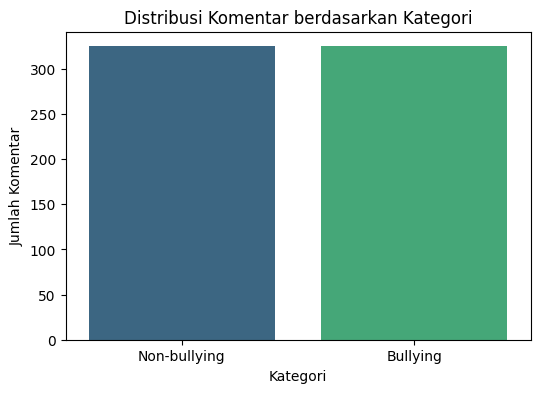

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi komentar berdasarkan kategori
if 'Kategori' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Kategori', palette='viridis')
    plt.title('Distribusi Komentar berdasarkan Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Komentar')
    plt.show()
else:
    print("Kolom 'Kategori' tidak ditemukan di DataFrame untuk visualisasi.")

Visualisasi rata-rata panjang komentar per kategori.

/tmp/ipython-input-4069672922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Kategori', y='Panjang_Komentar', palette='viridis')


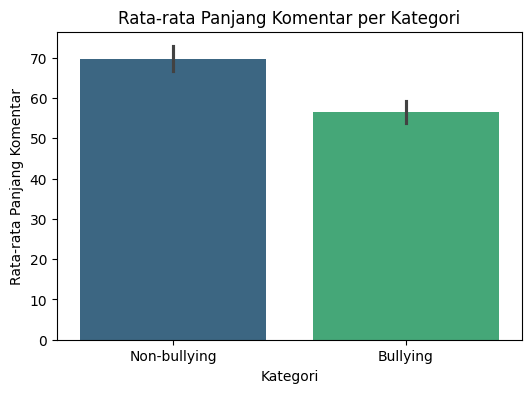

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi rata-rata panjang komentar per kategori
if 'Kategori' in df.columns and 'Panjang_Komentar' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x='Kategori', y='Panjang_Komentar', palette='viridis')
    plt.title('Rata-rata Panjang Komentar per Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Rata-rata Panjang Komentar')
    plt.show()
elif 'Kategori' not in df.columns:
    print("Kolom 'Kategori' tidak ditemukan di DataFrame untuk visualisasi rata-rata panjang komentar.")
elif 'Panjang_Komentar' not in df.columns:
     print("Kolom 'Panjang_Komentar' tidak ditemukan di DataFrame. Pastikan Anda sudah menghitung panjang komentar.")